# Construindo um classificador de Árvore de decisão

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn import cross_validation
from sklearn.tree import DecisionTreeClassifier

from utilities import visualize_classifier

/home/jailson/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
# carregando dados
input_file = 'data_decision_trees.txt'
data = np.loadtxt(input_file, delimiter = ',')
X,y = data[:, :-1], data[:, -1]

Separando os dados de entrada em duas classes separadas com base nos rótulos:

In [3]:
class_0 = np.array(X[y==0])
class_1 = np.array(X[y==1])

Visualizando os dados de entrada usando o grafico de dispersão:

Text(0.5,1,'Input Data')

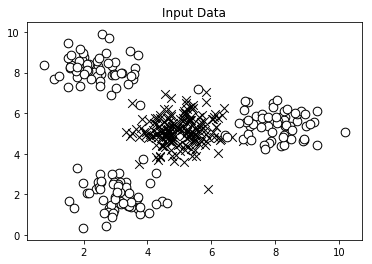

In [4]:
plt.figure()
plt.scatter(class_0[:,0],class_0[:,1], s=75,facecolors='black',
           edgecolor='black',linewidth=1,marker='x')
plt.scatter(class_1[:,0],class_1[:,1],s=75,facecolors='white',
           edgecolor='black',linewidth=1,marker='o')
plt.title('Input Data')

Dividindo o conjuto de dados em teinamento e teste:

In [5]:
X_train,X_test,y_train,y_test = cross_validation.train_test_split(
            X,y,test_size=0.25,random_state=5)

criando, construindo e visualizando um classificador de árvore de decisão com base no conjunto de dados de treinamento. O random_state parâmetro refere-se á semente usada pelo gerador de números aleatórios para inicialização do algoritmo de classificação da árvore de decisão. O max_depth parâmetro refere-se à profundidade máxima da árvore que queremos construir:

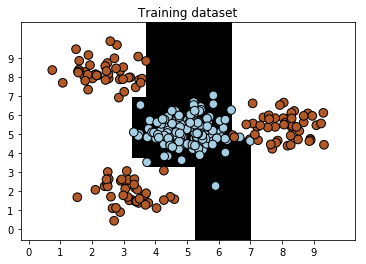

In [6]:
# Decisio Trees classifier
params = {'random_state':0,'max_depth':4}
classifier = DecisionTreeClassifier(**params)
classifier.fit(X_train,y_train)
visualize_classifier(classifier,X_train,y_train,'Training dataset')

Calcule a saída do classificador no conjuntode dados de teste e visualize-o:

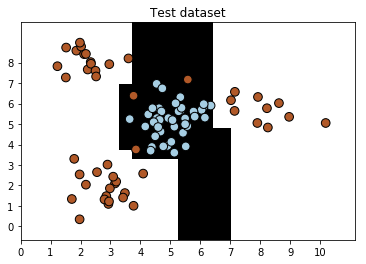

In [7]:
y_test_pred = classifier.predict(X_test)
visualize_classifier(classifier,X_test,y_test,"Test dataset")

desempenho do classificador imprimindo o relatório de classificação:

In [8]:
# Evaluate classifier performance 
class_names = ['Class-0', 'Class-1'] 
print("\n" + "#"*40) 
print("\nClassifier performance on training dataset\n") 
print(classification_report(y_train, classifier.predict(X_train), target_names=class_names)) 
print("#"*40 + "\n") 

print("#"*40) 
print("\nClassifier performance on test dataset\n") 
print(classification_report(y_test, y_test_pred, target_names=class_names)) 
print("#"*40 + "\n") 

plt.show()


########################################

Classifier performance on training dataset

             precision    recall  f1-score   support

    Class-0       0.99      1.00      1.00       137
    Class-1       1.00      0.99      1.00       133

avg / total       1.00      1.00      1.00       270

########################################

########################################

Classifier performance on test dataset

             precision    recall  f1-score   support

    Class-0       0.93      1.00      0.97        43
    Class-1       1.00      0.94      0.97        47

avg / total       0.97      0.97      0.97        90

########################################

